# 模型的评估与参数调优

In [1]:
from preamble import *
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['legend.numpoints'] = 1

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# create a synthetic dataset
X, y = make_blobs(random_state=0)
# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)
# evaluate the model on the test set
logreg.score(X_test, y_test)
# we predicted the correct class on 88% of the samples in X_test

0.88

## 交叉验证/Cross-validation

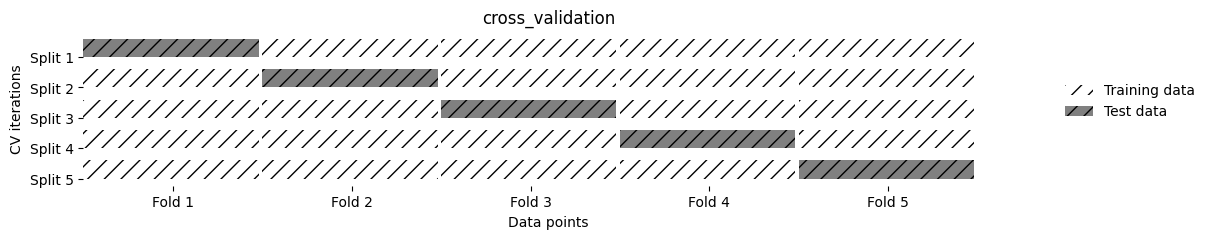

In [3]:
mglearn.plots.plot_cross_validation()

### sklearn中的交叉验证

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("cross-validation scores: ", scores)

cross-validation scores:  [0.967 1.    0.933 0.967 1.   ]


In [5]:
scores.mean()

0.9733333333333334

## K折交叉验证

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


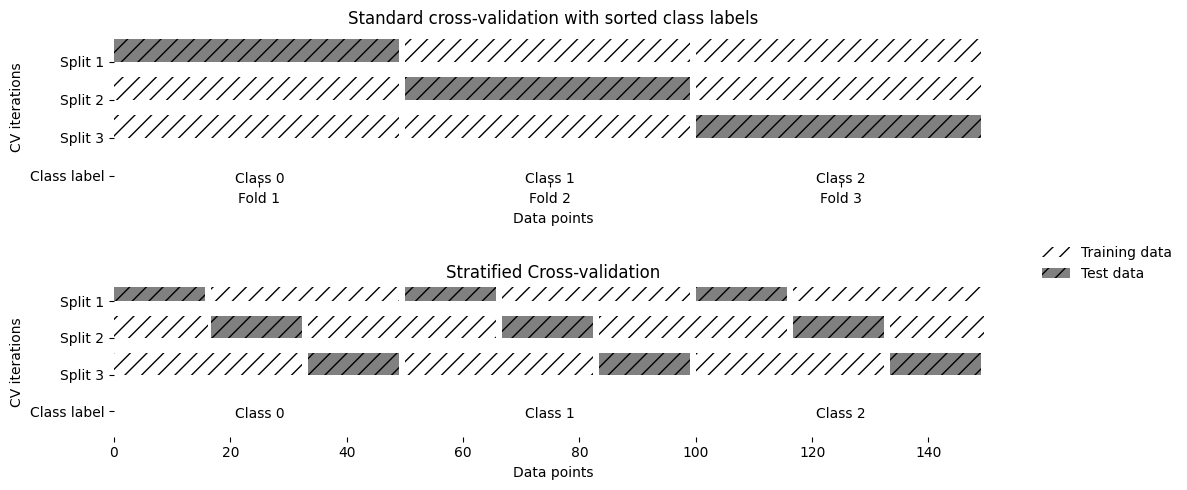

In [7]:
mglearn.plots.plot_stratified_cross_validation()

## 交叉验证相关设定

In [9]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [10]:
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([1.   , 1.   , 0.867, 0.933, 0.833])

In [11]:
kfold = KFold(n_splits=3)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([0., 0., 0.])

In [12]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([0.98, 0.96, 0.96])

- 随机打乱数据：在上面的代码中，我们设置了 `shuffle=True`，这意味着在进行交叉验证之前，我们会随机打乱数据的顺序。
- 这可以帮助我们得到更稳定的性能评分，特别是当数据的顺序有某种特定的模式时。

### 留一交叉验证

In [14]:
iris.data.shape

(150, 4)

In [13]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("number of cv iterations: ", len(scores))
print("mean accuracy: ", scores.mean())

number of cv iterations:  150
mean accuracy:  0.9666666666666667


Note: ``LeaveOneOut()`` is equivalent to ``KFold(n_splits=n)`` and
``LeavePOut(p=1)`` where ``n`` is the number of samples.

- 留一法交叉验证的优点是利用了最大量的数据进行训练，因此通常可以得到较低偏差的性能估计。
- 然而，它的缺点是计算成本较高，特别是当样本数量较大时。因此，留一法通常在样本数量较少，且计算资源充足的情况下使用。

### 乱序分割交叉验证

In [15]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)

array([0.947, 0.947, 0.987, 0.947, 0.96 , 0.987, 0.973, 0.933, 0.96 ,
       0.96 ])

- 随机排列交叉验证的优点是它可以处理大数据集，并且可以灵活地设置训练集和测试集的大小。
- 此外，由于每次迭代都会随机打乱样本的顺序，因此可以得到更稳定的性能估计。
- 然而，它的缺点是每次迭代的训练集和测试集可能会有重叠，这可能会导致性能估计的高方差。

### 数据分组与交叉验证

Group_KFold


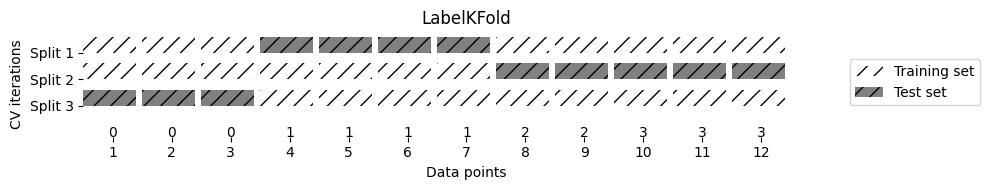

In [16]:
print("Group_KFold")
mglearn.plots.plot_label_kfold()

In [17]:
from sklearn.model_selection import GroupKFold
from mglearn.datasets import make_blobs
# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)
# assume the first three samples belong to the same group, then the next four etc.
labels = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
cross_val_score(logreg, X, y, groups=labels, cv=GroupKFold(n_splits=3))

array([1., 1., 1.])

分组K折交叉验证（GroupKFold）特别适合处理数据中存在自然分组的情况。以下是一些具体的例子：

1. 医疗数据：在医疗数据中，我们可能有来自同一患者的多个样本，例如在不同时间点收集的数据，或者来自不同身体部位的数据。在这种情况下，我们希望模型能够泛化到新的患者，而不仅仅是已经见过的患者。因此，我们可以将每个患者的所有样本划分为同一组，然后使用分组K折交叉验证来评估模型的性能。

2. 时间序列数据：在时间序列数据中，我们可能有来自同一时间段的多个样本，例如在同一天或同一小时内收集的数据。在这种情况下，我们希望模型能够泛化到新的时间段，因此我们可以将同一时间段的所有样本划分为同一组，然后使用分组K折交叉验证来评估模型的性能。

3. 实验数据：在实验数据中，我们可能有来自同一实验条件的多个样本。在这种情况下，我们希望模型能够泛化到新的实验条件，因此我们可以将同一实验条件的所有样本划分为同一组，然后使用分组K折交叉验证来评估模型的性能。

在这些例子中，分组K折交叉验证可以帮助我们更准确地评估模型在新的组（例如新的患者、新的时间段、新的实验条件）上的性能，而不是在已经见过的组上的性能。

- 分组K折交叉验证的优点是它可以处理数据中的组结构，例如，当数据中的样本存在自然的分组时（例如，同一组的样本可能来自同一人、同一日、同一实验等），或者当我们希望模型能够泛化到新的组时。
- 然而，它的缺点是每个折的样本数量可能会不均衡，这可能会影响性能评分的稳定性。

## 网格搜索/Grid Search

### 最简单的网格搜索

In [18]:
# naive grid search implementation
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Size of training set: %d   size of test set: %d" % (X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set 
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print("best score: ", best_score)
print("best parameters: ", best_parameters)

Size of training set: 112   size of test set: 38
best score:  0.9736842105263158
best parameters:  {'C': 100, 'gamma': 0.001}


In [19]:
best_score

0.9736842105263158

- 最简单的网格搜索的使用场景是当我们需要手动搜索模型的超参数空间时，例如当我们不确定哪一组超参数能够给出最优性能时。
- 它的优点是可以系统地搜索超参数空间，而且实现简单。
- 然而，它的缺点是计算成本较高，特别是当超参数空间较大或者模型训练时间较长时。
- 此外，这种方法可能会导致过拟合，因为它在测试集上选择了最优的超参数，而测试集本应被保留用于最终的性能评估。
- 为了避免这个问题，我们通常会使用更复杂的网格搜索方法，例如带交叉验证的网格搜索。

### 验证集可以帮助我们了解情况，防止在训练集上过拟合

threefold_split


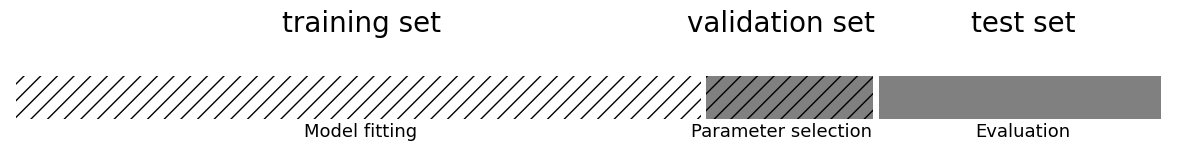

In [20]:
print("threefold_split")
mglearn.plots.plot_threefold_split()

In [21]:
from sklearn.svm import SVC
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
# split train+validation set into training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: %d   size of validation set: %d   size of test set: %d" % (X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set 
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined training and validation set, and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("best score on validation set: ", best_score)
print("best parameters: ", best_parameters)
print("test set score with best parameters: ", test_score)

Size of training set: 84   size of validation set: 28   size of test set: 38
best score on validation set:  0.9642857142857143
best parameters:  {'C': 10, 'gamma': 0.001}
test set score with best parameters:  0.9210526315789473


- 使用验证集的优点是可以帮助我们了解模型在未见过的数据上的性能，从而防止在训练集上过拟合。
- 此外，它还可以帮助我们选择超参数，从而优化模型的性能。
- 然而，它的缺点是需要更多的数据，因为我们需要将数据划分为训练集、验证集和测试集。
- 在数据量较小的情况下，我们可能会使用交叉验证来代替单独的验证集，以更有效地利用数据。

### 网格搜索与交叉验证

In [22]:
# reference: manual_grid_search_cv
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

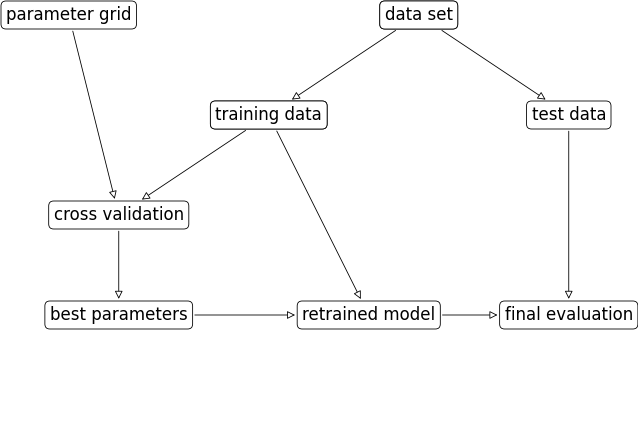

In [23]:
mglearn.plots.plot_grid_search_overview()

In [24]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [27]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [28]:
grid_search.score(X_test, y_test)

0.9736842105263158

In [29]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'gamma': 0.1}
0.9731225296442687


In [30]:
grid_search.best_estimator_

SVC(C=10, gamma=0.1)

In [33]:
# grid_search.cv_results_

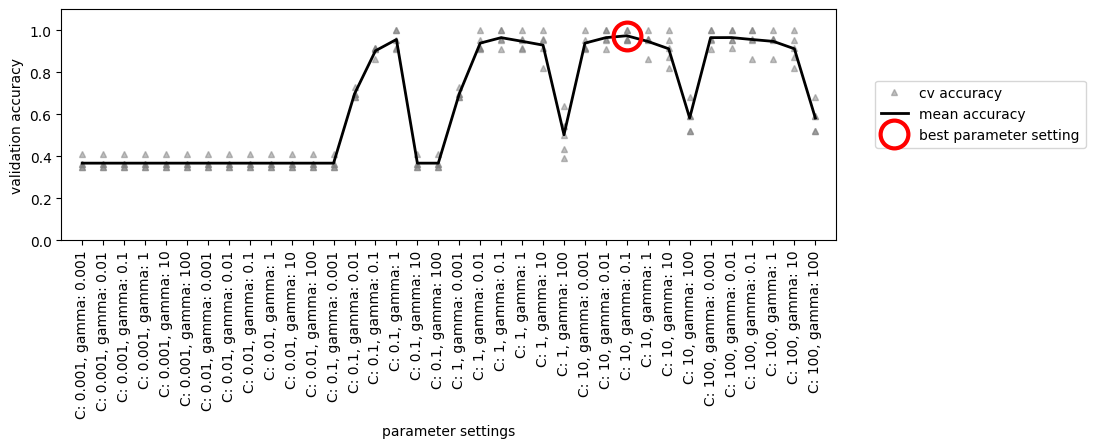

In [31]:
# mglearn.plots.plot_cross_val_selection()
scores = grid_search.cv_results_
cv = 5
length = len(scores['rank_test_score'] )

plt.figure(figsize=(10, 3))
plt.xlim(-1, length)
plt.ylim(0, 1.1)
for i in range(cv):
    marker_cv = plt.plot(scores[f'split{i}_test_score'], '^', c='gray', markersize=5, alpha=.5)
slic = scores['rank_test_score'] == 1
marker_mean = plt.plot(scores['mean_test_score'], '-', c='k', alpha=1, markersize=10)
marker_best = plt.plot(np.arange(length)[slic], scores['mean_test_score'][slic], 'o', c='red', fillstyle="none", alpha=1, markersize=20, markeredgewidth=3)

plt.xticks(range(length), [str(param).strip("{}").replace("'", "") for param in scores['params']], rotation=90);
plt.ylabel("validation accuracy")
plt.xlabel("parameter settings")
plt.legend([marker_cv[0], marker_mean[0], marker_best[0]], ["cv accuracy", "mean accuracy", "best parameter setting"], loc=(1.05, .4))

### 检视交叉验证的结果

In [34]:
scores = grid_search.cv_results_
scores

{'mean_fit_time': array([0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
        0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
        0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
        0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]),
 'std_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]),
 'mean_score_time': array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
        0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
        0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.   ,
        0.001, 0.001, 0.001, 0.001, 0.   , 0.   , 0.001, 0.001, 0.001]),
 'std_score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]),
 'param_C': masked

In [35]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=None, vmax=None)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for y, value in zip(range(6), img.get_array()):
        for x in range(6):
            # print(x+0.5, y+0.5)
            ax.text(x+0.5, y+0.5, fmt % value[x], color='k' if value[x] > 0.9 else 'w', ha="center", va="center")
    return img

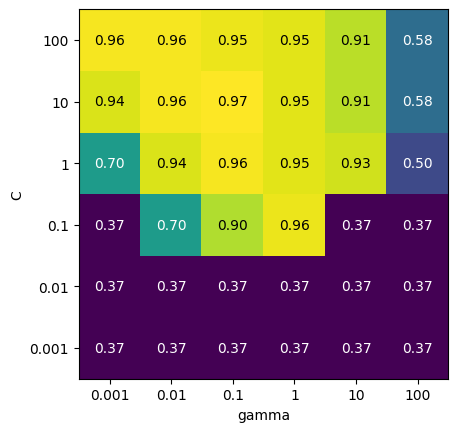

In [36]:
mean_scores = scores['mean_test_score']
mean_scores = np.array(mean_scores).reshape(6, 6)

# plot the mean cross-validation scores
heatmap(mean_scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
                      yticklabels=param_grid['C'], cmap="viridis")

- 微调

gridsearch_failures


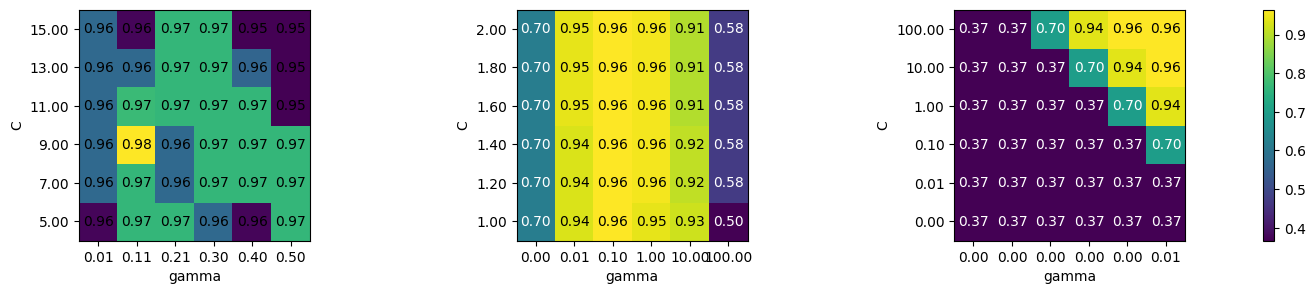

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(20, 3))

param_grid_linear = {'C': np.linspace(5, 15, 6),
                     'gamma':  np.linspace(0.01, 0.5, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.logspace(-3, 2, 6)} # log

param_grid_range = {'C': np.logspace(-3, 2, 6),        # log
                     'gamma':  np.logspace(-7, -2, 6)} # log


for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    mean_scores = grid_search.cv_results_['mean_test_score']
    mean_scores = np.array(mean_scores).reshape(6, 6)

    # plot the mean cross-validation scores
    scores_image = heatmap(mean_scores, xlabel='gamma', ylabel='C', xticklabels=[f'{i:.2f}' for i in param_grid['gamma']],
                                         yticklabels=[f'{i:.2f}' for i in param_grid['C']], cmap="viridis", ax=ax)
    
plt.colorbar(scores_image, ax=axes.tolist())
print("gridsearch_failures")

### 嵌套交叉验证

嵌套交叉验证是一种更为严谨的模型评估和选择方法，它包含了两层交叉验证：内层交叉验证用于超参数选择，外层交叉验证用于评估选择好超参数的模型的性能。

In [38]:
# 法一：
scores = cross_val_score(
    GridSearchCV(
        SVC(), param_grid, cv=5
    ), 
    iris.data, iris.target, cv=5
)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.967 1.    0.967 0.967 1.   ]
Mean cross-validation score:  0.9800000000000001


自定义嵌套交叉验证函数：

- 最外层：这一层是外层交叉验证的循环，它将数据集分为训练+验证集和测试集。
- 中间层：这一层是超参数网格的循环，它遍历所有的超参数组合。
- 最内层：这一层是内层交叉验证的循环，它将训练+验证集进一步分为训练集和验证集。

In [44]:
# 法二：
# 更灵活，可以接受任何分类器和参数网格。
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    outer_model = []
    # for each split of the data in the outer cross-validation
    # (split method returns indices)
    for training_samples, test_samples in tqdm(outer_cv.split(X, y)):
        # find best parameter using inner cross-validation:
        best_score = -np.inf
        # iterate over parameters
        for parameters in parameter_grid:
            # accumulate score over inner splits
            cv_scores = []
            # iterate over inner cross-validation
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                # build classifier given parameters and training data
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # evaluate on inner test set
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # compute mean score over inner folds
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # if better than so far, remember parameters
                best_score = mean_score
                best_params = parameters
        # build classifier on best parameters using outer training set
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # evaluate 
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
        outer_model.append(clf)
    return outer_scores, best_params

In [45]:
from tqdm import tqdm

In [46]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
outer_scores, best_params = nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))
outer_scores

5it [00:01,  3.58it/s]


[0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 1.0]

- 嵌套交叉验证的优点是可以更准确地评估模型的性能，因为它同时考虑了模型的训练误差和验证误差，而且还考虑了超参数选择的不确定性。
- 此外，它还可以防止过拟合，因为它在选择超参数时使用了交叉验证，而不是单独的验证集。
- 然而，它的缺点是计算成本较高，因为它需要进行两层交叉验证。

嵌套交叉验证通常在我们需要同时进行模型选择和性能评估时使用，例如在比较不同的模型或者不同的超参数设置时。


<details>
  <summary>点击折叠/展开 for StratifiedKFold</summary>
    
StratifiedKFold是sklearn库中的一个类，用于实现分层k折交叉验证。分层k折交叉验证是k折交叉验证的一个变种，它的特点是在每一折中，每个类别的样本比例大致和完整数据集中相同。

在标准的k折交叉验证中，数据被随机分为k个子集，每次使用k-1个子集进行训练，1个子集进行测试。这种方法的问题是，如果数据集的类别分布不均匀，那么在一些折中，某个类别的样本可能会很少，这可能会影响模型的训练和验证。

分层k折交叉验证解决了这个问题。在分层k折交叉验证中，每一折都尽可能保持每个类别的样本比例，这样可以确保在每次训练和验证时，每个类别的样本都足够多。

StratifiedKFold类的主要参数包括：

- n_splits：折数，即将数据集划分为多少份。
- shuffle：是否打乱数据顺序。
- random_state：随机种子，用于控制随机打乱的结果。

StratifiedKFold的主要方法是split，它接受特征和标签，返回每一折的训练集和测试集的索引。

分层k折交叉验证通常在类别不均衡的数据集上使用，例如在某个类别的样本远多于其他类别的样本时。通过使用分层k折交叉验证，我们可以确保在每次训练和验证时，每个类别的样本都足够多，从而提高模型的性能。
  
</details>
